# Import Libraries

In [27]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error  

# Data Cleaning, Preprocessing and Feature Engineering

In [3]:
df = pd.read_hdf('/kaggle/input/metr-la-dataset/METR-LA.h5', key='df')
print("DataFrame shape:", df.shape)

DataFrame shape: (34272, 207)


In [4]:
df.head(10)

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:25:00,57.333333,69.000000,67.666667,61.666667,67.333333,69.000000,60.666667,67.333333,63.000000,63.333333,...,42.000000,70.000,68.333333,57.333333,66.000,54.666667,64.666667,57.666667,69.000000,57.333333
2012-03-01 00:30:00,66.500000,63.875000,67.875000,62.375000,64.375000,67.750000,65.125000,64.875000,56.250000,63.000000,...,41.250000,69.375,59.500000,44.625000,64.250,62.625000,65.500000,51.000000,69.375000,61.250000
2012-03-01 00:35:00,63.625000,67.250000,63.250000,60.500000,57.375000,65.500000,64.625000,65.500000,60.375000,66.625000,...,52.000000,65.875,59.750000,64.125000,66.125,62.375000,67.500000,52.000000,68.625000,59.375000
2012-03-01 00:40:00,68.750000,65.250000,63.500000,63.000000,65.125000,68.000000,65.125000,63.750000,62.625000,66.750000,...,52.500000,68.375,61.250000,64.375000,66.500,66.250000,64.375000,48.625000,67.625000,61.750000
2012-03-01 00:45:00,63.500000,61.500000,62.500000,58.125000,66.625000,64.250000,64.875000,66.500000,53.250000,60.750000,...,41.375000,69.250,62.625000,58.875000,61.125,64.250000,66.125000,50.750000,66.250000,62.250000


In [ ]:
print((df == 0).sum().sum())  
print((df == 0).sum(axis=0)) 

575302
773869    3843
767541    2149
767542    2149
717447    2174
717446    2463
          ... 
717592    3097
717595    2264
772168    2150
718141    2526
769373    2170
Length: 207, dtype: int64


In [ ]:
df.index = pd.to_datetime(df.index) 
df = df.asfreq('5T')  # Force a 5-minute frequency
print(df.index.freq) 


<5 * Minutes>


<ipython-input-6-eef1020489f0>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.asfreq('5T')  # Force a 5-minute frequency


In [ ]:
zero_percent = (df == 0).sum() / len(df) * 100
print(zero_percent.sort_values(ascending=False).head(20))  

718076    20.103875
716939    18.860878
760987    16.141457
716955    15.680439
769418    15.607493
769405    15.598739
717481    15.064776
717510    15.044351
717513    14.061041
717576    13.640873
718204    13.500817
767454    12.418301
718072    12.050654
769430    11.928105
767471    11.890173
717490    11.779295
717491    11.747199
767610    11.338702
773869    11.213235
759772    10.947712
dtype: float64


In [ ]:
df.replace(0, np.nan, inplace=True)
df.interpolate(method='time', inplace=True)  

In [9]:
print((df == 0).sum().sum())

0


In [10]:
df.head(10)

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:15:00,61.777778,65.500000,62.555556,59.888889,66.777778,67.166667,63.222222,65.277778,63.583333,64.694444,...,43.416667,69.333333,60.444444,58.611111,67.416667,59.888889,65.305556,60.138889,69.571429,60.444444
2012-03-01 00:20:00,59.555556,67.250000,65.111111,60.777778,67.055556,68.083333,61.944444,66.305556,63.291667,64.013889,...,42.708333,69.666667,64.388889,57.972222,66.708333,57.277778,64.986111,58.902778,69.285714,58.888889
2012-03-01 00:25:00,57.333333,69.000000,67.666667,61.666667,67.333333,69.000000,60.666667,67.333333,63.000000,63.333333,...,42.000000,70.000000,68.333333,57.333333,66.000000,54.666667,64.666667,57.666667,69.000000,57.333333
2012-03-01 00:30:00,66.500000,63.875000,67.875000,62.375000,64.375000,67.750000,65.125000,64.875000,56.250000,63.000000,...,41.250000,69.375000,59.500000,44.625000,64.250000,62.625000,65.500000,51.000000,69.375000,61.250000
2012-03-01 00:35:00,63.625000,67.250000,63.250000,60.500000,57.375000,65.500000,64.625000,65.500000,60.375000,66.625000,...,52.000000,65.875000,59.750000,64.125000,66.125000,62.375000,67.500000,52.000000,68.625000,59.375000
2012-03-01 00:40:00,68.750000,65.250000,63.500000,63.000000,65.125000,68.000000,65.125000,63.750000,62.625000,66.750000,...,52.500000,68.375000,61.250000,64.375000,66.500000,66.250000,64.375000,48.625000,67.625000,61.750000
2012-03-01 00:45:00,63.500000,61.500000,62.500000,58.125000,66.625000,64.250000,64.875000,66.500000,53.250000,60.750000,...,41.375000,69.250000,62.625000,58.875000,61.125000,64.250000,66.125000,50.750000,66.250000,62.250000


In [11]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df.index.month

In [ ]:
lags = [1, 2, 3, 5] 
lagged_dfs = []  

for lag in lags:
    lagged_df = df.shift(lag).add_suffix(f'_lag_{lag}') 
    lagged_dfs.append(lagged_df)

df = pd.concat([df] + lagged_dfs, axis=1)


In [ ]:
window_size = 3

rolling_features = df.rolling(window=window_size).mean().add_suffix(f'_rolling_mean_{window_size}')
df = pd.concat([df, rolling_features], axis=1)

In [14]:
df.dropna(inplace=True)

In [15]:
df.head(10)

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,717590_lag_5_rolling_mean_3,717592_lag_5_rolling_mean_3,717595_lag_5_rolling_mean_3,772168_lag_5_rolling_mean_3,718141_lag_5_rolling_mean_3,769373_lag_5_rolling_mean_3,hour_lag_5_rolling_mean_3,day_of_week_lag_5_rolling_mean_3,is_weekend_lag_5_rolling_mean_3,month_lag_5_rolling_mean_3
2012-03-01 04:50:00,65.000000,59.000000,67.125000,50.500000,64.250000,63.375000,65.250000,64.250000,58.500000,67.000000,...,63.912037,57.430556,63.550926,60.527778,56.981481,62.173280,4.000000,3.0,0.0,3.0
2012-03-01 04:55:00,62.875000,63.375000,64.750000,55.125000,68.375000,65.000000,63.250000,59.375000,60.250000,66.125000,...,63.537037,55.055556,61.800926,61.111111,54.981481,62.256614,4.000000,3.0,0.0,3.0
2012-03-01 05:00:00,63.750000,58.375000,67.500000,60.750000,61.500000,61.875000,65.375000,62.625000,60.500000,67.250000,...,61.162037,54.222222,62.884259,61.611111,56.606481,62.518519,4.000000,3.0,0.0,3.0
2012-03-01 05:05:00,64.125000,61.750000,66.000000,57.125000,58.500000,64.500000,64.625000,61.875000,60.875000,66.428571,...,60.166667,57.375000,62.541667,62.208333,57.625000,63.750000,4.000000,3.0,0.0,3.0
2012-03-01 05:10:00,63.125000,63.250000,66.375000,55.750000,63.500000,65.000000,62.250000,61.125000,59.250000,66.375000,...,60.791667,58.555556,63.976852,62.893519,60.578704,63.398148,4.000000,3.0,0.0,3.0
2012-03-01 05:15:00,63.000000,58.666667,67.666667,57.777778,66.777778,65.111111,64.888889,64.000000,58.111111,66.333333,...,61.666667,61.388889,63.768519,62.226852,58.870370,62.356481,4.000000,3.0,0.0,3.0
2012-03-01 05:20:00,65.333333,62.111111,66.333333,58.888889,66.888889,65.000000,65.555556,59.888889,61.777778,66.000000,...,59.833333,57.305556,65.560185,62.101852,60.912037,62.314815,4.000000,3.0,0.0,3.0
2012-03-01 05:25:00,65.750000,61.875000,67.500000,60.250000,66.125000,65.375000,66.000000,58.375000,58.750000,68.000000,...,58.541667,57.541667,63.583333,62.500000,60.916667,62.166667,4.333333,3.0,0.0,3.0
2012-03-01 05:30:00,65.777778,55.333333,68.111111,56.666667,63.777778,65.777778,64.777778,66.222222,56.222222,64.333333,...,59.000000,57.208333,64.583333,63.083333,64.875000,62.583333,4.666667,3.0,0.0,3.0
2012-03-01 05:35:00,62.875000,63.625000,68.250000,56.000000,66.500000,63.875000,64.875000,61.750000,60.625000,56.125000,...,61.250000,59.416667,63.875000,63.250000,60.958333,63.083333,5.000000,3.0,0.0,3.0


In [20]:
df.shape

(34214, 2110)

In [22]:
df_sampled = df.iloc[::5].copy()

df_sampled.shape

(6843, 2110)

# Data splitting

In [ ]:
train_size = int(len(df_sampled) * 0.8)

train_df = df_sampled.iloc[:train_size]
test_df = df_sampled.iloc[train_size:]


print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

# Splitting features and target variables
target_sensors = [col for col in df.columns if col.isnumeric()] 
X_train, y_train = train_df.drop(columns=target_sensors), train_df[target_sensors]
X_test, y_test = test_df.drop(columns=target_sensors), test_df[target_sensors]

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Model Training

In [ ]:
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 100
}
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, "Test")], early_stopping_rounds=10)

y_pred = model.predict(dtest)

# Compute Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")


Train set shape: (5474, 2110)
Test set shape: (1369, 2110)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:35:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	Test-rmse:12.93735
[1]	Test-rmse:12.33165
[2]	Test-rmse:11.75779
[3]	Test-rmse:11.21664
[4]	Test-rmse:10.70003
[5]	Test-rmse:10.20954
[6]	Test-rmse:9.74919
[7]	Test-rmse:9.30980
[8]	Test-rmse:8.89378
[9]	Test-rmse:8.49885
[10]	Test-rmse:8.12472
[11]	Test-rmse:7.77099
[12]	Test-rmse:7.43715
[13]	Test-rmse:7.12172
[14]	Test-rmse:6.82031
[15]	Test-rmse:6.53591
[16]	Test-rmse:6.26766
[17]	Test-rmse:6.01493
[18]	Test-rmse:5.77526
[19]	Test-rmse:5.54952
[20]	Test-rmse:5.33557
[21]	Test-rmse:5.13375
[22]	Test-rmse:4.94349
[23]	Test-rmse:4.76315
[24]	Test-rmse:4.59509
[25]	Test-rmse:4.43540
[26]	Test-rmse:4.28551
[27]	Test-rmse:4.14439
[28]	Test-rmse:4.01074
[29]	Test-rmse:3.88567
[30]	Test-rmse:3.76786
[31]	Test-rmse:3.65717
[32]	Test-rmse:3.55271
[33]	Test-rmse:3.45468
[34]	Test-rmse:3.36360
[35]	Test-rmse:3.27771
[36]	Test-rmse:3.19776
[37]	Test-rmse:3.12274
[38]	Test-rmse:3.05181
[39]	Test-rmse:2.98587
[40]	Test-rmse:2.92474
[41]	Test-rmse:2.86656
[42]	Test-rmse:2.81303
[43]	Test-rmse:

In [24]:
model.save_model("xgb_traffic_model.json")

# Metrics


In [26]:
# Compute errors  
mae = mean_absolute_error(y_test, y_pred)  
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)  
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  

# Symmetric Mean Absolute Percentage Error (SMAPE)  
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))  

print(f"MAE: {mae:.4f}")  
print(f"RMSE: {rmse:.4f}")  
print(f"R² Score: {r2:.4f}")  
print(f"MAPE: {mape:.2f}%")  
print(f"SMAPE: {smape:.2f}%")  


MAE: 1.0432
RMSE: 1.9093
R² Score: 0.9441
MAPE: 2.93%
SMAPE: 2.61%


# Plots

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


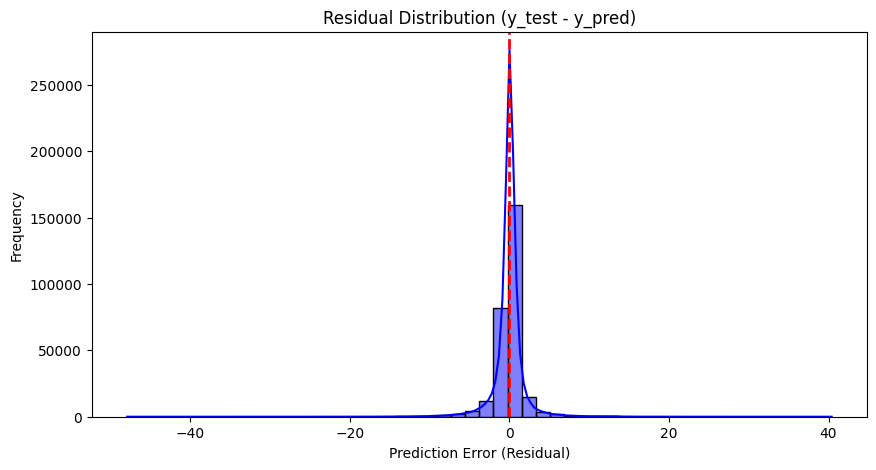

In [ ]:
# Compute residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals.values.flatten(), bins=50, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Residual Distribution (y_test - y_pred)")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.show()


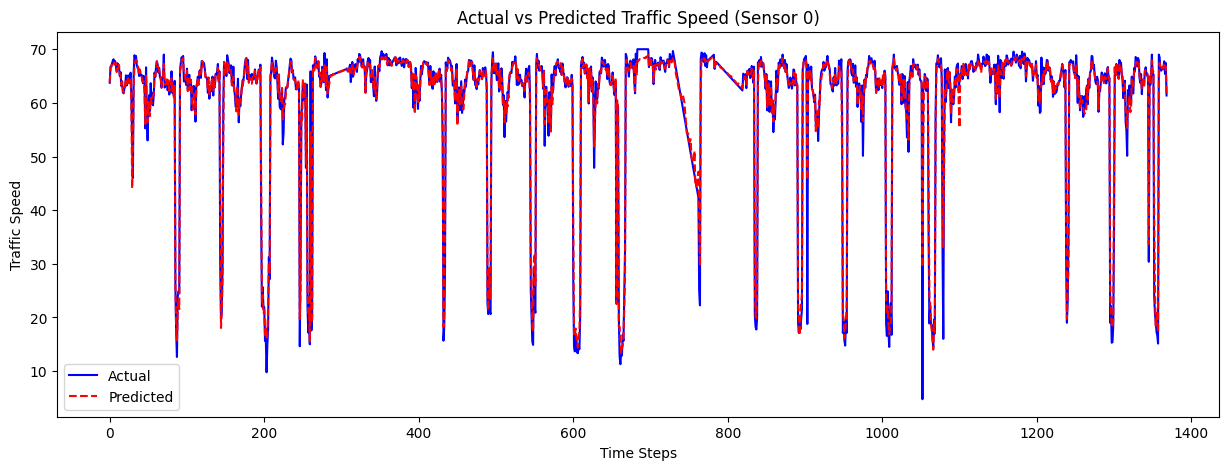

In [ ]:
plt.figure(figsize=(15, 5))
sensor_idx = 0 
plt.plot(y_test.iloc[:, sensor_idx].values, label="Actual", color="blue")
plt.plot(y_pred[:, sensor_idx], label="Predicted", color="red", linestyle="dashed")

plt.title(f"Actual vs Predicted Traffic Speed (Sensor {sensor_idx})")
plt.xlabel("Time Steps")
plt.ylabel("Traffic Speed")
plt.legend()
plt.show()
